 # IMDb Movie Rankings

## Introduction

IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. 
It offers a searchable database of more than 250 million data items including more than 4 million movies, TV and entertainment programs and 8 million cast and crew members. 
IMDb launched online in 1990 and has been a subsidiary of Amazon.com since 1998.(IMDB)

IMDb webite is commonly used for reviewing movies and the following definitions are used by IMDb to rate movies:

    1. Rating: IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. 
               Individual votes are then aggregated and summarized as a single IMDb rating.
    2. Metascore: IMDB collects reviews from various critics, assigns a score to there reviews and then applies a
                  weighted average based on the quality and stature of their reviews

It is also possible to collect data points from the IMDb database on the gross revenue made made by movies, the genre, actors, directors as well as cat members involved with the movie.

Due to the availability of data it is become possible for researchers to investigate and analyse the relationships
between different variables associated with movie performance. As one can imagine it is important for movie studios and investors to investigate these relationships so that they can make predictions on the commercial success of any new movie.

For this project I will investigate a number of different variables researchers believe contribute to movie performance, including gross revenue for historical movies. By comparing ratings, metascores, gross revenue and genre it may be
possible to see a relationship, hence point to a movie genre one should invest in if wanting to achieve successful return on their investment.

I will outline inital research in the area around the determinants of movie performance, derive descriptive statistics from an
IMDb dataset and use these statistics to build a simulated dataset using the variables to follow.

## Previous research review

According to (Pangarker and Smith) from as early as the mid-1960’s analysts, studios, and investors alike have been 
researching which variables contribute to the commercial success of films. In their reseach, they looked at at various
dependant variables and their contribution to global box office revenue. They found that the most significant contributor to
box office revenues was the production cost i.e. the bigger the budget, the more succesful the movie

Research carried out by Litman (1983) viewed ratings, production budget, cast and director as the most important determinants 
of movie performance. Litman went on the model the relationships between revenue (dependant variable) and production cost, 
star rating, and genre (independant variables) using a multiple regression model. 

Liman found that production costs were positively correlated with revenue and critics star ratings was also significant. 

De Vany and Walls (1999) found that it was very difficult to find relationships between variables and that a success of a movie
did not follow the normal distribution. It was more skewed to some very dominant movies whos's success was extremely difficult to
predict. 

Reinstein and Snyder (2000) looked at the power of critics reviews and movie performance and found that only certain critic reviews 
would influence the performance of a movie. 

Research carried out by Ramos (2015) on the data contained in the IMDb database found that production budgets can ensure
better than average box office returns but was not a certainty to deliver better than average returns. In this research Netflix
data was used as a comparison to eliminate bias possibly contained in the IMDb due to 'voter stuffing' i.e. trying to push up a movies rating by asking people to vote.  

Terry (2015) employed correlation models to show relationships between themed horror movies and box office revenue. Terry found
that certain types of themes such as slasher movies were more positibely correlated with box office performance. 

According to (Metaccritic.com), Metascores can contribute to the performance of a movie in the long run. Even if a film earns significant revenue in the opening weekend, low metascores over the preceeding weeks will lead to lower box office revenues.

## Project Methodology

For this project I will use a dataset from Kaggle.com that was originally imported from the IMDb database. It contains data on 100 movies. The dataset contains multiple variables but I will reduce it to four, based on previous research on the derminants of movie success.

To create a simulated dataset I will first get the descriptive statistics on the dataset imported from Kaggle and then use those 
statistics in my simulation model to mirror the properties of the original dataset. 



## Data and Modelling

In [1]:
%matplotlib inline
# import pandas library; pandas is a library used for data analysis and creating data structures in Python
import pandas as pa
# import numpy library; numpy is a statistical library used for data analysis using Python
import numpy as np
# Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as mpl
# Seaborn is a Python data visualization library based on matplotlib. 
import seaborn as sns
# Scipy is a package for mathematics, science, and engineering and libraries
import scipy.stats as ss

In [2]:
# import csv from github created repository / dataset originally imported from kaggle.com
Movie = pa.read_csv("https://raw.githubusercontent.com/donalcarr85/Datasets/master/IMDB-Movie-Data.csv",nrows=100)
Movie;

In [3]:
# rename Revenue column
Movie = Movie.rename(columns={'Revenue (Millions)':'Revenue_Millions'})
moviedf = Movie.iloc[:,[8,9,10,11]]
moviedf;

In [28]:
pa.set_option('display.float_format', lambda x: '%.0f' % x)
moviedf.describe()

,Rating,Votes,Revenue_Millions,Metascore
count,100,100,91,94
mean,7,267334,157,63
std,1,336930,183,16
min,3,222,0,16
25%,7,40968,32,53
50%,7,130883,100,66
75%,8,355254,210,74
max,9,1791916,937,99


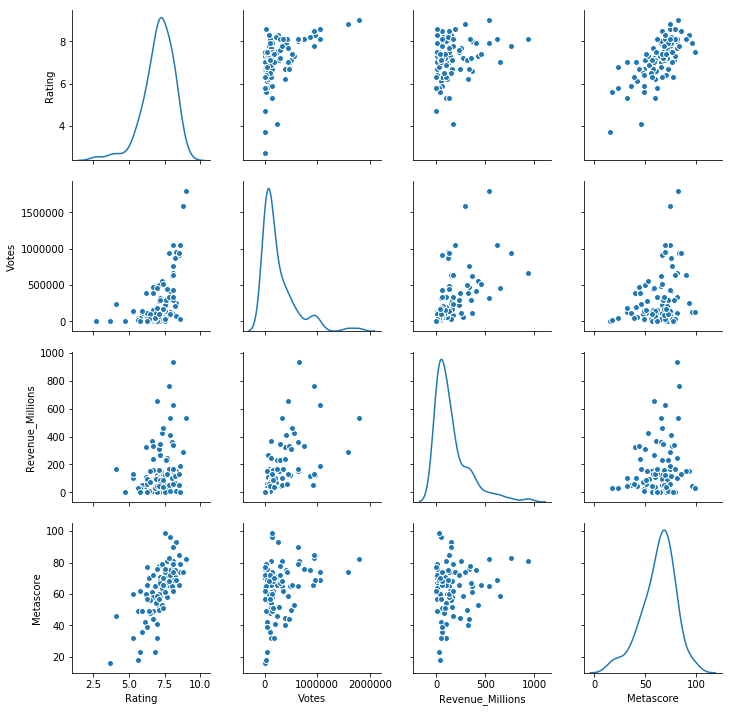

In [31]:
np.warnings.filterwarnings('ignore')
g = sns.pairplot(moviedf, diag_kind="kde")
    

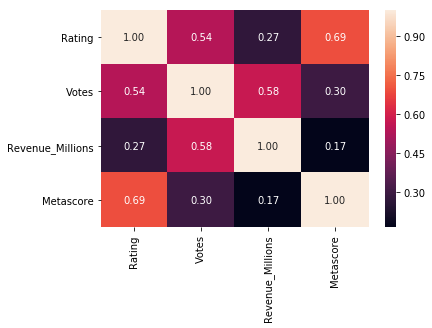

In [48]:
sns.heatmap(moviedf.corr(), annot=True, fmt=".2f")

## Distributions

### Rating

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


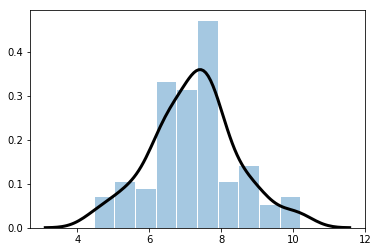

In [6]:
r = np.random.normal(7.086, 1.067, 100)
sns.distplot(r,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Votes

In [54]:
q1v = moviedf['Votes'].quantile(.25)
q3v = moviedf['Votes'].quantile(.75)
maskv = moviedf['Votes'].between(q1, q3, inclusive=True)
iqrv = moviedf.loc[mask, 'Votes']

In [55]:
iqrv.describe().round

<bound method Series.round of count       50
mean    158517
std      89803
min      41362
25%     102090
50%     130883
75%     206864
max     342429
Name: Votes, dtype: float64>

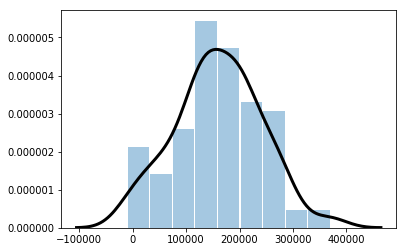

In [56]:
v = np.random.normal(158517,89803, 100)
sns.distplot(rev,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Revenue

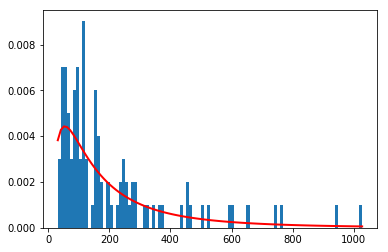

In [46]:
sns.boxplot(y="Revenue_Millions", data=moviedf,color="skyblue")

In [9]:
## https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr ##
q1 = moviedf['Revenue_Millions'].quantile(.25)
q3 = moviedf['Revenue_Millions'].quantile(.75)
mask = moviedf['Revenue_Millions'].between(q1, q3, inclusive=True)
iqr = moviedf.loc[mask, 'Revenue_Millions']

In [10]:
iqr.describe().round()

count    45.000
mean    101.000
std      47.000
min      32.000
25%      55.000
50%     100.000
75%     138.000
max     188.000
Name: Revenue_Millions, dtype: float64

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


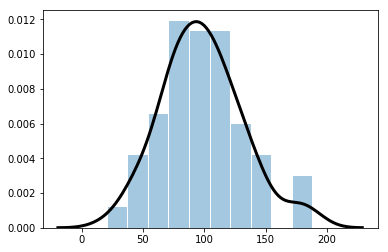

In [11]:
rev = np.random.normal(101,30, 100)
sns.distplot(rev,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Metascore

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


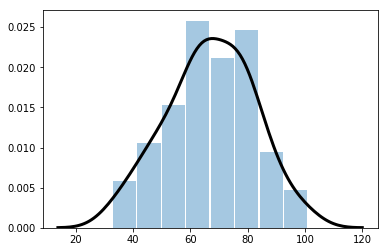

In [12]:
m = np.random.normal(62.95,16.4, 100)
sns.distplot(m,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

## Create Dataframe using simulated data

In [57]:
SimData = pa.DataFrame({
           'Rating': r,
           'Votes': v,
           'Revenue': rev,
           'Metascore': m},
            columns = ['Rating','Votes','Revenue','Metascore'])

In [58]:
SimData.round(0);

## Relationships

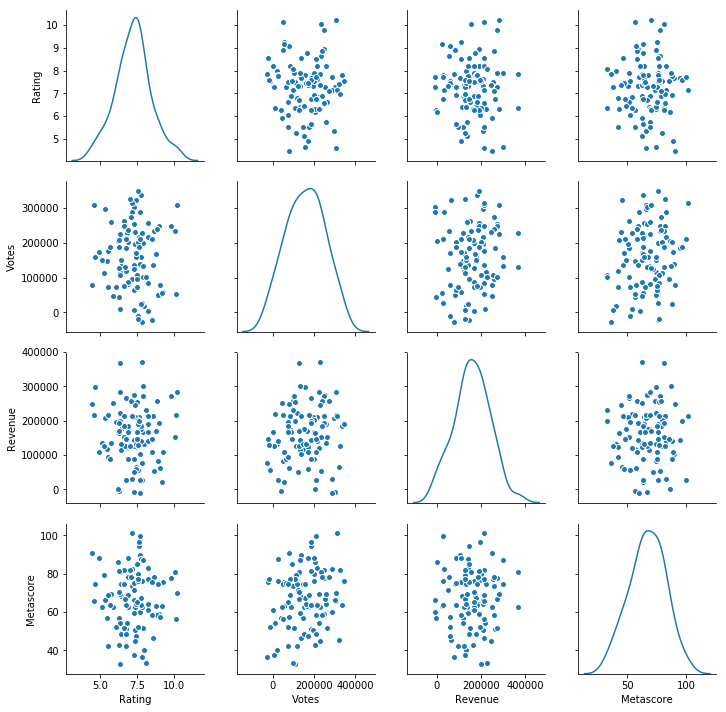

In [59]:
 sm = sns.pairplot(SimData, diag_kind="kde")

## Bibliography

1. IMDB Website - https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=__seemr#


2. N.A. Pangarker and E.v.d.M. Smit 2013,The determinants of box office performance in the film industry revisited.
   https://pdfs.semanticscholar.org/c960/7aaa7746ec9735a19d0ab2e524e53d20ab7f.pdf

3. Litman, B. 1983. ‘Predicting success of theatrical movies: An empirical study’, Journal of Popular Culture.
   https://www.researchgate.net/publication/229673102_Predicting_Success_of_Theatrical_Movies_An_Empirical_Study

4. De Vany, A. & Walls, W.D. 2002. ‘Does Hollywood make too many R-rated movies? Risk, stochastic dominance, and
the illusion of expectation’Journal of business
   https://www.jstor.org/stable/10.1086/339890?seq=8#metadata_info_tab_contents
   https://www.nytimes.com/2000/03/23/business/economic-scene-golden-formula-for-hollywood-success-it-only-happens-movies.html

5. David A. Reinstein,2000. The Influence of Expert Reviews on Consumer Demand for Experience Goods:
    A Case Study of Movie Critics
    http://ses-perso.telecom-paristech.fr/survey/CanauxInformBienExpe/ReinsteinSnyder2000.pdf

6. Marlon Ramos,Angelo M. Calvão,Celia Anteneodo, 2015 Statistical Patterns in Movie Rating Behavior
   https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4555649/

7. Neil Terry, The Determinants of Box Office Revenue for Horror Movie
   http://www.jgbm.org/page/28Neil%20Terry%20.pdf 

8. https://www.metacritic.com/feature/film-quality-vs-box-office-grosses

9. Sangkil Moon, Paul K. Bergey, & Dawn Iacobucc, 2010 Dynamic Effects Among Movie, Ratings, Movie Revenues,and viewer
   Satisfaction
   https://pdfs.semanticscholar.org/097d/4ef52957c7260cf56bddd5dd0973fe6b109e.pdf

10. Lognormal Distributions
    http://www.ucd.ie/ecomodel/Resources/Sheet4_data_distributions_WebVersion.html
    

In [43]:
mu, sigma = 2.67, 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100)
s

array([ 15.60703351,  16.0461622 ,   2.32426698,  39.87996392,
        11.46160991,  11.11007553,  26.31864621, 384.39469624,
        20.68169895,  17.77551455,  81.34319768,  12.66505732,
         3.37786108,   8.28384008,  12.5628481 ,  13.52618632,
         3.30556795,  19.9237298 ,  62.6693641 ,   7.45753986,
        32.14304751,  29.86036334,  91.13556495,   9.8864028 ,
        52.13343189,   2.70364264,   3.32007308,  17.60109863,
         5.19262268,   7.21138141,  22.43846539,  63.53822207,
        23.38058422,  54.89620428,  29.75229782,   2.6685842 ,
        15.66926768,  31.97138556,  19.47852121,  25.55347183,
         3.6319655 ,  13.25671805,  14.33363216,  38.12808499,
         8.00310733,  51.17534279, 102.24716745,   3.56886071,
        21.46517255,   4.56876922,   7.28480315,  16.27147831,
         5.13490567,  20.33979335,  14.27535679,   1.1808479 ,
        17.96051622,  15.03994803,  39.20828259,   8.32779503,
        17.18415231,   3.53359159,  23.64682537,  15.89